<a href="https://colab.research.google.com/github/kanishkraj-ops/Machine-Learning/blob/main/Car_price_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Lets import the csv file and the required libraries to start with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing the csv
car_file_path = './audi.csv'
car_sales = pd.read_csv(car_file_path)
car_sales.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [26]:
# 1)Lets check the anatomy of our dataset(columns,dtypes,describe,info)
car_sales.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [27]:
car_sales.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [28]:
car_sales.dtypes
#obj:model,transmission,fuelType
#we need to work on these while making the model

,0
model,object
year,int64
price,int64
transmission,object
mileage,int64
fuelType,object
tax,int64
mpg,float64
engineSize,float64


In [29]:
#THIS IS VERY IMPORTANT
#CHECK FOR NULL VALUES IN YOUR DATASET
car_sales.isnull().sum()#we have none

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


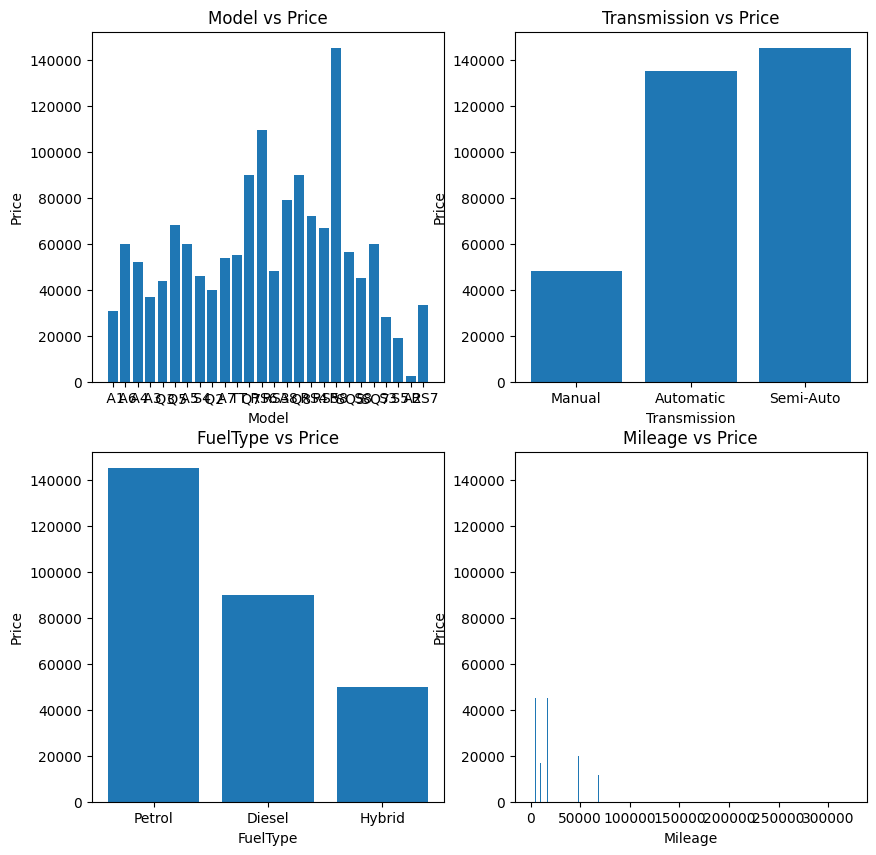

In [38]:
#2)Lets do some plots for better understanding the data
fig ,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,10))
graph = ax1.bar(car_sales['model'],car_sales['price'])
ax1.set(title='Model vs Price',xlabel='Model',ylabel='Price')

graph = ax2.bar(car_sales['transmission'],car_sales['price'])
ax2.set(title='Transmission vs Price',xlabel='Transmission',ylabel='Price')

graph = ax3.bar(car_sales['fuelType'],car_sales['price'])
ax3.set(title='FuelType vs Price',xlabel='FuelType',ylabel='Price')

graph = ax4.bar(car_sales['mileage'],car_sales['price'])
ax4.set(title='Mileage vs Price',xlabel='Mileage',ylabel='Price');

In [31]:
car_sales.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

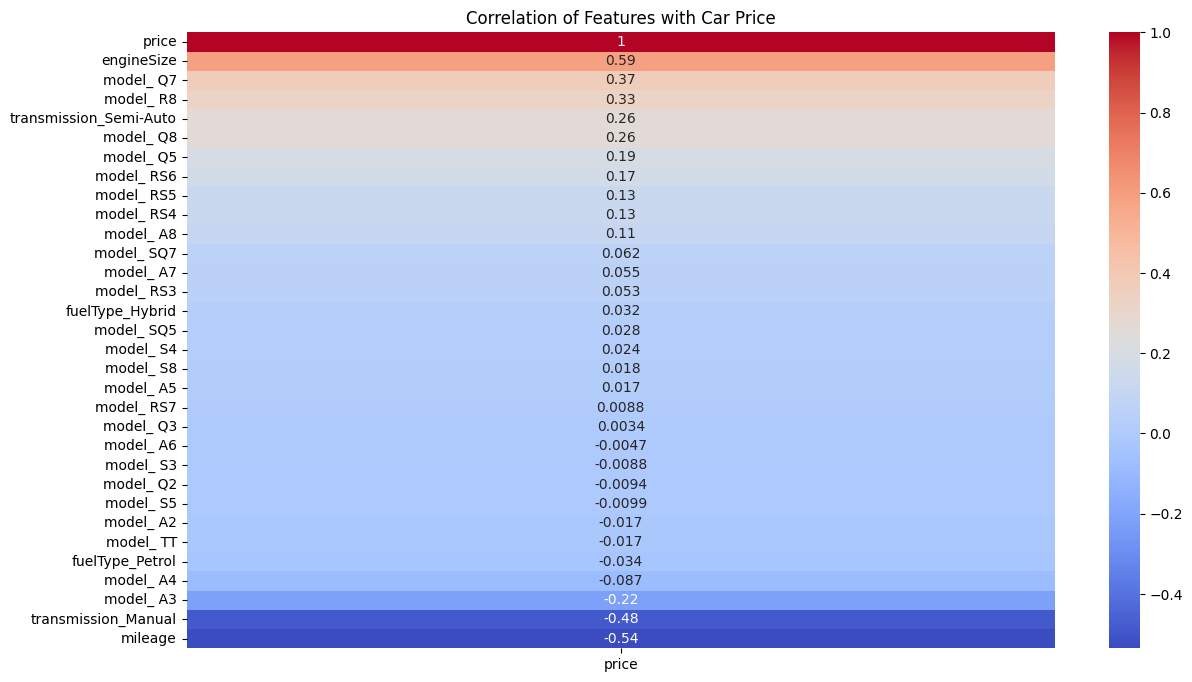

In [32]:
#lets make the model but first we need to cahnge the obj to numeric
#also lets first create a heatmap that tells about how other features affect the price
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Features to include
features = ["fuelType", "transmission", "model", "mileage", "engineSize", "price"]

# Encode categorical variables
car_sales_encoded = pd.get_dummies(car_sales[features], drop_first=True)

# Plot correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(car_sales_encoded.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Car Price")
plt.show()


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

# Define original feature columns
features = ["fuelType", "transmission", "model", "mileage", "engineSize"]
target = "price"

# One-hot encode categorical variables
car_sales_encoded = pd.get_dummies(car_sales[features + [target]], drop_first=True)

#Drop target to get features (use all remaining columns)
X = car_sales_encoded.drop('price', axis=1)
y = car_sales_encoded['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Results:")
print("MSE:", mse)
print("RMSE:", mse ** 0.5)
print("R² Score:", r2)

✅ Random Forest Regressor Results:
MSE: 14685481.194028111
RMSE: 3832.164035375849
R² Score: 0.9028284928382313


In [35]:
print(predictions)

[13688.24       21024.495      30496.88125    ... 17616.84
 20136.32       11325.21928571]


In [44]:
new_car = {
    'mileage':3000,
    'engineSize': 2.0,
    'fuelType_Petrol': 1,
    'transmission_Manual': 1,
    'model_A5': 1,
    # all other dummies = 0 (missing keys are auto-filled with 0)
}

# Make sure it has all columns the model was trained on
all_features = X.columns.tolist()
new_car_full = pd.DataFrame([new_car], columns=all_features).fillna(0)

# Predict price
predicted_price = model.predict(new_car_full)[0]
print("Predicted Price ($):", round(predicted_price, 2))


Predicted Price ($): 25529.91
